In [ ]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from wordcloud import WordCloud



In [20]:
df_france = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/naver_movie_reviews_fr.csv')
df_korea = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/naver_movie_reviews_KR.csv')

mecab = Mecab()
stopwords = ['는', '이', '영화', '다', '고', '하', '은', '의', '도', '가', '을', '들', '은', '보', '에', '한', '한', '게', '없', '를', '지', '있', '좋', '만', '나', '안', '었', '적', '너무', '습니다', '지만', '음', '어요', '는데', '로', '네요', '했', '봤', '점', '과', '잘', '아', '진짜', '는데', '으로', '적', '것', '정말', '좋', '최고', '어요', '지만', '수', '기', '만', '면', '같','되', '주', 'ㅋㅋ', '할', '꼭', '볼', '거', '았', '네', '어', '않', '좀', '인', '에서', '울', '인', '와', '던', '이런', '그', '왜', '겠', '알', '듯', '그냥', '내', '거', '해', '아니', '함', '더', '냐', '싶', '입니다', '뭐', '스토리', '합니다', '였', '좀', '본', '년', '더', '함', '와', '만들', '내', '해', '알', 'ㅋㅋㅋ', '라', '보다', '듯', '면서', '때', '이런', '냐', '까지', '싶', '번', '그', '내', '야', '라고', '서', '나오', '세요', '해서', '건', '봐야', '돈', '말', '평점', '많', '기대', '별로', '못', '남', '많이', '남', '일', '비', '개', '분', '편', 'ㅡㅡ', '이건', '줄', '으면', '재밌', '재미있', '재미없', '잼', '사람']


def tokenize(df):
  df['tokenized'] = df['comment'].apply(mecab.morphs)
  df['tokenized'] = df['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])


def pre_processing(df):
    _df = df.copy()
    _df['label'] = np.select([_df.score <= 5, _df.score > 5], [0, 1])
    _df.drop_duplicates(subset=['comment'], inplace=True)  # 중복 제거
    _df['comment'] = _df['comment'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '')  # 한글만
    _df['comment'] = _df['comment'].str.replace('^ +', '')
    _df['comment'].replace('', np.nan, inplace=True)
    _df.dropna(subset=['comment'], inplace=True)

    tokenize(_df)
    
    return _df



df_france, df_korea = map(pre_processing, [df_france, df_korea])

negative_words = np.hstack(df_france[df_france.label == 0]['tokenized'].values)
positive_words = np.hstack(df_france[df_france.label == 1]['tokenized'].values)

negative_word_count_fr = Counter(negative_words)
positive_word_count_fr = Counter(positive_words)

negative_words = np.hstack(df_korea[df_korea.label == 0]['tokenized'].values)
positive_words = np.hstack(df_korea[df_korea.label == 1]['tokenized'].values)

negative_word_count_kr = Counter(negative_words)
positive_word_count_kr = Counter(positive_words)

print(negative_word_count_fr)
print(positive_word_count_fr)
print(negative_word_count_kr)
print(positive_word_count_kr)



Counter({'지루': 1825, '내용': 1581, '액션': 1520, '시간': 1045, '최악': 985, '재미': 973, '생각': 944, '이해': 914, '쓰레기': 866, '감독': 862, '끝': 843, '성': 841, '다가': 838, '아깝': 813, '똥': 801, '실망': 741, '모르': 735, '여자': 734, '프랑스': 734, '니': 722, '임': 711, '정도': 683, '처음': 677, '이게': 675, '느낌': 656, '사랑': 647, '에이즈': 646, '배우': 643, '하나': 634, '주인공': 629, '자': 607, '라는': 588, '무슨': 583, '감동': 573, '전개': 565, '이거': 564, '다는': 562, '중': 561, '높': 557, '완전': 556, '다고': 548, '바': 541, '뿐': 540, '장면': 522, '걸': 520, '꼬': 516, '반전': 512, '죽': 502, '는지': 502, '이상': 499, '때문': 482, '동성애': 481, '이야기': 478, '이렇게': 472, '난': 470, '맞': 469, '인지': 469, '어서': 457, '아서': 452, '엔': 450, '연기': 445, '결말': 443, '긴': 443, '마': 441, 'ㅠㅠ': 441, '짜증': 436, '마지막': 431, '받': 430, '참': 427, '중간': 426, '남자': 422, '소재': 421, '화': 419, '애': 419, '이나': 417, '인데': 413, '별': 412, '에게': 403, '랑': 401, '길': 399, '솔직히': 397, '된': 391, '내내': 383, '대': 381, 'ㅋ': 381, '충': 378, '시': 378, '데': 368, '부터': 367, '아닌': 362, '만든': 355, '전혀': 35

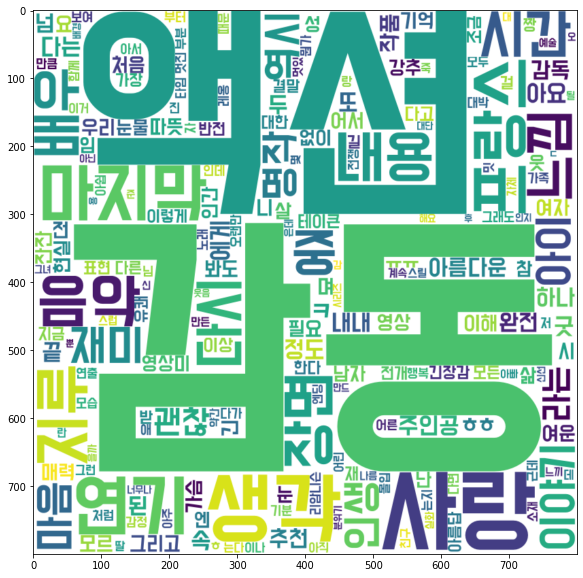

In [21]:
wordcloud = WordCloud(    
    font_path='/content/drive/MyDrive/Colab Notebooks/BMDOHYEON_otf.otf',
    width=800,
    height=800,
    background_color='white'
)

%matplotlib inline
wordcloud = wordcloud.generate_from_frequencies(positive_word_count_fr)

fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud.to_array(), interpolation="bilinear")
plt.show()